In [1]:
from sklearn.datasets import make_blobs

n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]

X_blobs, y_blobs = make_blobs(n_samples=[n_samples_1, n_samples_2], 
                              centers=centers, 
                              cluster_std=clusters_std, 
                              random_state=0, shuffle=False)
print(X_blobs, y_blobs)




[[ 2.64607852  0.60023581]
 [ 1.46810698  3.3613398 ]
 [ 2.80133699 -1.46591682]
 ...
 [ 1.68550965  2.53503626]
 [ 1.68945865  2.86728609]
 [ 1.45085528  2.28630668]] [0 0 0 ... 1 1 1]


In [2]:
from sklearn.datasets import make_circles

X_circles, y_circles = make_circles(500, factor=0.1, noise=0.1)
print(X_circles, y_circles)


[[ 1.47134451e-01  4.01869085e-02]
 [ 1.52481027e-01 -3.23220864e-01]
 [-5.12567084e-01  8.65794692e-01]
 [ 5.81100581e-02  4.86311744e-03]
 [ 9.54114999e-01 -3.89511692e-01]
 [ 2.56223868e-01  2.06433993e-01]
 [-2.08548980e-01  1.54664837e-01]
 [-1.98656510e-01  1.12280809e-01]
 [-5.07226667e-01 -5.87821855e-01]
 [-5.48517200e-02  7.67338492e-02]
 [ 1.08796360e+00 -2.91252871e-02]
 [-1.27054438e-01  1.55751306e-01]
 [ 3.51948861e-02  2.64501472e-01]
 [-1.01911736e+00  2.79414906e-01]
 [ 9.49080138e-01  3.11553017e-02]
 [-1.74463435e-01 -7.82435682e-02]
 [-1.53032836e-01  6.95498245e-02]
 [ 1.25845757e-01  1.28902748e-01]
 [ 2.29115255e-02 -2.62984356e-01]
 [ 1.12602740e+00  1.71380878e-01]
 [ 2.26520943e-03  3.18561976e-02]
 [ 1.63719528e-03 -5.46942292e-02]
 [ 6.06096280e-01  8.76819933e-01]
 [-1.93511876e-01  9.92121700e-02]
 [ 2.32929236e-02  9.99211067e-01]
 [-9.84063903e-02  5.90116205e-02]
 [ 3.89499184e-01 -7.97710810e-01]
 [ 3.77667105e-01 -9.51496444e-01]
 [-3.88682516e-01  8

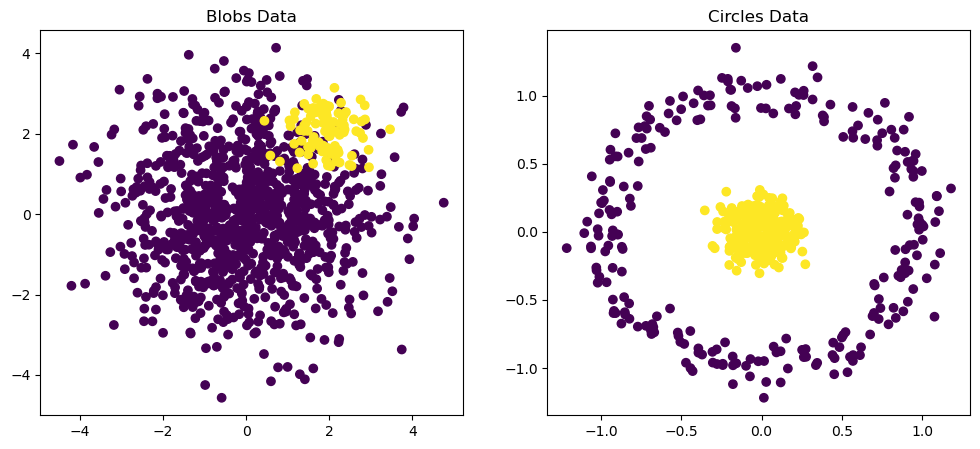

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

# Blobs data
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X_blobs, y_blobs = make_blobs(n_samples=[n_samples_1, n_samples_2], 
                              centers=centers, 
                              cluster_std=clusters_std, 
                              random_state=0, shuffle=False)

# Circles data
X_circles, y_circles = make_circles(500, factor=0.1, noise=0.1)

# Visualize the datasets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis')
plt.title('Blobs Data')
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis')
plt.title('Circles Data')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Blobs data split
X_train_blobs, X_temp_blobs, y_train_blobs, y_temp_blobs = train_test_split(X_blobs, y_blobs, test_size=0.4, random_state=0)
X_control_blobs, X_test_blobs, y_control_blobs, y_test_blobs = train_test_split(X_temp_blobs, y_temp_blobs, test_size=0.5, random_state=0)

# Circles data split
X_train_circles, X_temp_circles, y_train_circles, y_temp_circles = train_test_split(X_circles, y_circles, test_size=0.4, random_state=0)
X_control_circles, X_test_circles, y_control_circles, y_test_circles = train_test_split(X_temp_circles, y_temp_circles, test_size=0.5, random_state=0)


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Scaling
scaler_blobs = StandardScaler().fit(X_train_blobs)
X_train_blobs_scaled = scaler_blobs.transform(X_train_blobs)
X_control_blobs_scaled = scaler_blobs.transform(X_control_blobs)
X_test_blobs_scaled = scaler_blobs.transform(X_test_blobs)

scaler_circles = StandardScaler().fit(X_train_circles)
X_train_circles_scaled = scaler_circles.transform(X_train_circles)
X_control_circles_scaled = scaler_circles.transform(X_control_circles)
X_test_circles_scaled = scaler_circles.transform(X_test_circles)

# MLP Classifier with hyperparameter tuning
mlp_blobs = MLPClassifier(hidden_layer_sizes=(60,), max_iter=1000, early_stopping=True, random_state=0)
mlp_blobs.fit(X_train_blobs_scaled, y_train_blobs)

mlp_circles = MLPClassifier(hidden_layer_sizes=(60,), max_iter=1000, early_stopping=True, random_state=0)
mlp_circles.fit(X_train_circles_scaled, y_train_circles)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(60,), max_iter=1000,
              random_state=0)

In [26]:
# Predictions
y_pred_train_blobs = mlp_blobs.predict(X_train_blobs_scaled)
y_pred_test_blobs = mlp_blobs.predict(X_test_blobs_scaled)

y_pred_train_circles = mlp_circles.predict(X_train_circles_scaled)
y_pred_test_circles = mlp_circles.predict(X_test_circles_scaled)


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, conf_matrix

# Blobs data evaluation
accuracy_blobs_train, precision_blobs_train, recall_blobs_train, f1_blobs_train, conf_matrix_blobs_train = evaluate_model(y_train_blobs, y_pred_train_blobs)
accuracy_blobs_test, precision_blobs_test, recall_blobs_test, f1_blobs_test, conf_matrix_blobs_test = evaluate_model(y_test_blobs, y_pred_test_blobs)

# Circles data evaluation
accuracy_circles_train, precision_circles_train, recall_circles_train, f1_circles_train, conf_matrix_circles_train = evaluate_model(y_train_circles, y_pred_train_circles)
accuracy_circles_test, precision_circles_test, recall_circles_test, f1_circles_test, conf_matrix_circles_test = evaluate_model(y_test_circles, y_pred_test_circles)

# Display the results
print("Blobs Data - Train Accuracy:", accuracy_blobs_train)
print("Blobs Data - Test Accuracy:", accuracy_blobs_test)
print("Circles Data - Train Accuracy:", accuracy_circles_train)
print("Circles Data - Test Accuracy:", accuracy_circles_test)


Blobs Data - Train Accuracy: 0.9212121212121213
Blobs Data - Test Accuracy: 0.8818181818181818
Circles Data - Train Accuracy: 0.9366666666666666
Circles Data - Test Accuracy: 0.91


In [11]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Random Forest Classifier
rf_blobs = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

rf_circles = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_circles.fit(X_train_circles_scaled, y_train_circles)

# Voting Classifier
voting_clf_blobs = VotingClassifier(estimators=[('mlp', mlp_blobs), ('rf', rf_blobs)], voting='soft')
voting_clf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

voting_clf_circles = VotingClassifier(estimators=[('mlp', mlp_circles), ('rf', rf_circles)], voting='soft')
voting_clf_circles.fit(X_train_circles_scaled, y_train_circles)


VotingClassifier(estimators=[('mlp',
                              MLPClassifier(early_stopping=True,
                                            hidden_layer_sizes=(60,),
                                            max_iter=1000, random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=0))],
                 voting='soft')

In [32]:
rf_blobs = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
rf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

rf_blobs = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
rf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

# Voting Classifier
voting_clf_blobs = VotingClassifier(estimators=[('mlp', mlp_blobs), ('rf', rf_blobs)], voting='hard')
voting_clf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

voting_clf_circles = VotingClassifier(estimators=[('mlp', mlp_circles), ('rf', rf_circles)], voting='hard')
voting_clf_circles.fit(X_train_circles_scaled, y_train_circles)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(early_stopping=True,
                                            hidden_layer_sizes=(60,),
                                            max_iter=1000, random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=0))])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest models with different max_depth values
rf_blobs_x = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_blobs_y = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

# Fit the models on the training data
rf_blobs_x.fit(X_train_blobs_scaled, y_train_blobs)
rf_blobs_y.fit(X_train_blobs_scaled, y_train_blobs)

# Make predictions on the test data
y_pred_rf_blobs_x = rf_blobs_x.predict(X_test_blobs_scaled)
y_pred_rf_blobs_y = rf_blobs_y.predict(X_test_blobs_scaled)

# Calculate the accuracy for both models
accuracy_rf_blobs_x = accuracy_score(y_test_blobs, y_pred_rf_blobs_x)
accuracy_rf_blobs_y = accuracy_score(y_test_blobs, y_pred_rf_blobs_y)

# Print the test accuracies
print("Random Forest with max_depth=5 - Test Accuracy:", accuracy_rf_blobs_x)
print("Random Forest with max_depth=6 - Test Accuracy:", accuracy_rf_blobs_y)


Random Forest with max_depth=5 - Test Accuracy: 0.9681818181818181
Random Forest with max_depth=6 - Test Accuracy: 0.9590909090909091


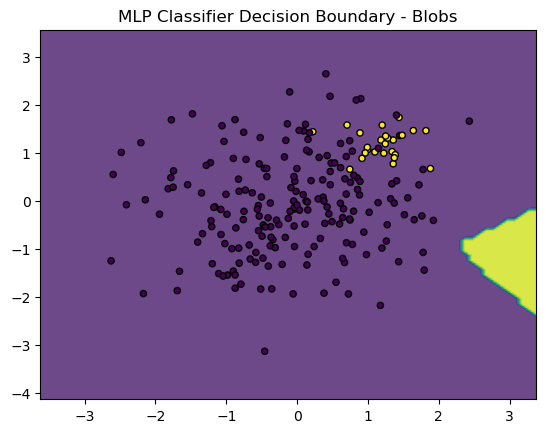

NameError: name 'voting_clf_best_blobs' is not defined

In [16]:
# Visualization of decision boundaries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Random Forest Classifier
rf_blobs = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

rf_circles = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_circles.fit(X_train_circles_scaled, y_train_circles)

# Voting Classifier
voting_clf_blobs = VotingClassifier(estimators=[('mlp', mlp_blobs), ('rf', rf_blobs)], voting='soft')
voting_clf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

voting_clf_circles = VotingClassifier(estimators=[('mlp', mlp_circles), ('rf', rf_circles)], voting='soft')
voting_clf_circles.fit(X_train_circles_scaled, y_train_circles)


def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest models with different max_depth values
rf_blobs_x = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
rf_blobs_y = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# Fit the models on the training data
rf_blobs_x.fit(X_train_blobs_scaled, y_train_blobs)
rf_blobs_y.fit(X_train_blobs_scaled, y_train_blobs)

# Make predictions on the test data
y_pred_rf_blobs_x = rf_blobs_x.predict(X_test_blobs_scaled)
y_pred_rf_blobs_y = rf_blobs_y.predict(X_test_blobs_scaled)

# Calculate the accuracy for both models
accuracy_rf_blobs_x = accuracy_score(y_test_blobs, y_pred_rf_blobs_x)
accuracy_rf_blobs_y = accuracy_score(y_test_blobs, y_pred_rf_blobs_y)

# Print the test accuracies
print("Random Forest with max_depth=5 - Test Accuracy:", accuracy_rf_blobs_x)
print("Random Forest with max_depth=6 - Test Accuracy:", accuracy_rf_blobs_y)


# Plot decision boundaries
plot_decision_boundary(mlp_blobs, X_test_blobs_scaled, y_test_blobs, "MLP Classifier Decision Boundary - Blobs")
plot_decision_boundary(voting_clf_best_blobs, X_test_blobs_scaled, y_test_blobs, "Voting Classifier Decision Boundary - Blobs")



In [17]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Random Forest Classifier
rf_blobs = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

rf_circles = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_circles.fit(X_train_circles_scaled, y_train_circles)

# Voting Classifier
voting_clf_blobs = VotingClassifier(estimators=[('mlp', mlp_blobs), ('rf', rf_blobs)], voting='soft')
voting_clf_blobs.fit(X_train_blobs_scaled, y_train_blobs)

voting_clf_circles = VotingClassifier(estimators=[('mlp', mlp_circles), ('rf', rf_circles)], voting='soft')
voting_clf_circles.fit(X_train_circles_scaled, y_train_circles)


VotingClassifier(estimators=[('mlp',
                              MLPClassifier(early_stopping=True,
                                            hidden_layer_sizes=(50,),
                                            max_iter=1000, random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=0))],
                 voting='soft')

In [43]:
from sklearn.ensemble import VotingClassifier
# Voting ensemble based on the best NN model
voting_clf_best_blobs = VotingClassifier(estimators=[('mlp', mlp_blobs), ('rf', rf_blobs_200)], voting='soft')
voting_clf_best_blobs.fit(X_train_blobs_scaled, y_train_blobs)

# Predictions and evaluation
y_pred_voting_best_blobs = voting_clf_best_blobs.predict(X_test_blobs_scaled)
accuracy_voting_best_blobs = accuracy_score(y_test_blobs, y_pred_voting_best_blobs)

print("Voting Classifier (Best NN + RF) - Test Accuracy:", accuracy_voting_best_blobs)



Voting Classifier (Best NN + RF) - Test Accuracy: 0.9681818181818181


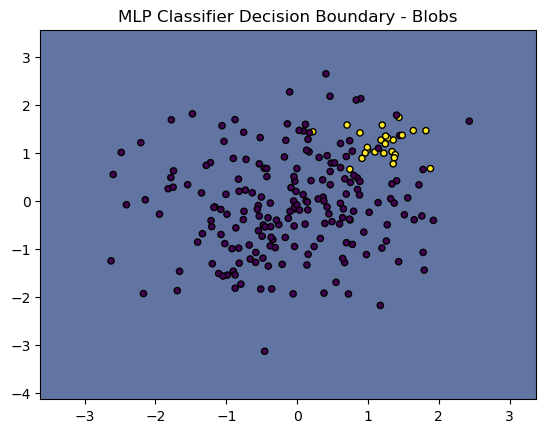

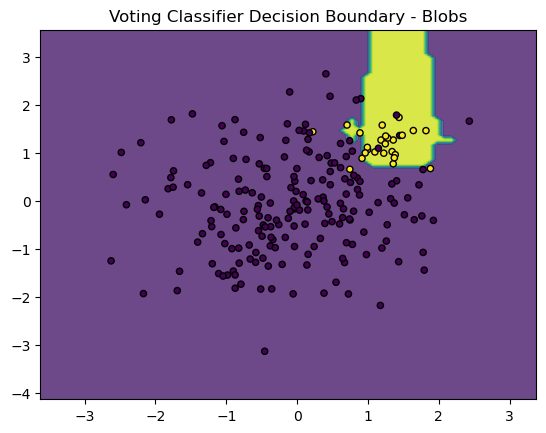

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(mlp_blobs, X_test_blobs_scaled, y_test_blobs, "MLP Classifier Decision Boundary - Blobs")
plot_decision_boundary(voting_clf_best_blobs, X_test_blobs_scaled, y_test_blobs, "Voting Classifier Decision Boundary - Blobs")


In [45]:
def calculate_shift_variation(y_true, y_pred_1, y_pred_2):
    shift = np.mean(y_pred_1 != y_pred_2)
    variation = np.var([y_pred_1, y_pred_2], axis=0).mean()
    return shift, variation

shift_blobs, variation_blobs = calculate_shift_variation(y_test_blobs, mlp_blobs.predict(X_test_blobs_scaled), voting_clf_best_blobs.predict(X_test_blobs_scaled))

print("Shift - Blobs:", shift_blobs)
print("Variation - Blobs:", variation_blobs)


Shift - Blobs: 0.11818181818181818
Variation - Blobs: 0.029545454545454545
